In [ ]:
#importing libraries
import pandas as pd
import numpy as np
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#checking no. of rows and cols
df.shape

(1338, 7)

In [ ]:
#checking for null values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: ylabel='age'>

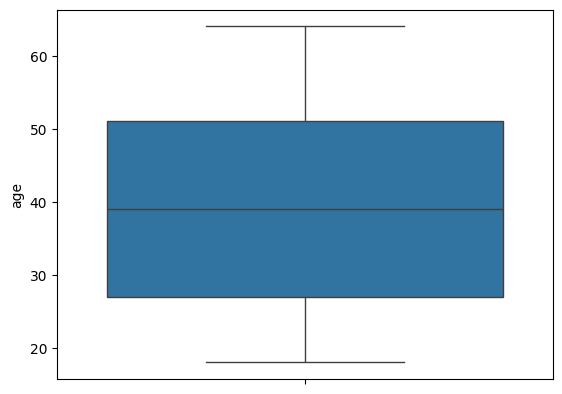

In [ ]:
#importing seaborn
import seaborn as sns
sns.boxplot(df['age'])

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Data separation

In [ ]:
x=df.drop(columns=['charges'],axis=1)
y=df["charges"]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(x)
X

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
x_train.head()

,age,sex,bmi,children,smoker,region
882,21,0,22.135,0,0,0
505,37,1,30.875,3,0,1
798,58,0,33.100,0,0,3
792,22,0,23.180,0,0,0
201,48,0,32.230,1,0,2


In [37]:
x_test.head()

,age,sex,bmi,children,smoker,region
17,23,1,23.845,0,0,0
1091,55,0,29.830,0,0,0
273,50,1,27.455,1,0,0
270,18,1,29.370,1,0,2
874,44,1,21.850,3,0,0


In [38]:
y_train.head()

882     2585.85065
505     6796.86325
798    11848.14100
792     2731.91220
201     8871.15170
Name: charges, dtype: float64

In [39]:
y_test.head()

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
Name: charges, dtype: float64

Buliding model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#initializing model
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

testing the model

In [40]:
y_pred=lr.predict(x_test)
y_pred

array([ 1885.54165174, 11944.32273357, 10455.55488707,  2397.96696161,
        8271.55347048, 11234.41036809,  3376.43169724,  1072.63123623,
       12060.51395933,  9468.23322457, 11494.97066851,  5053.0305502 ,
       30093.5527384 ,  -228.58148206, 12784.84199754, 13402.21956446,
        4179.28948043,  7740.09899682, 29568.66245635,  2738.01455718,
       12343.38521075,  1881.51269934, 34087.95253065, 32103.24119851,
       30445.32061394,  8632.58788645,  2298.01995336, 15417.01187725,
        6168.10928884,  1942.95830544,  9636.84483913,  5642.81556233,
        4058.10854408,  4853.19902886,  9764.94270973,  4755.04190386,
       30007.20570516,  6403.4791383 , 27582.56773006, 14149.40158117,
         151.96770571, 28000.88252814,  7724.4555082 ,  1093.99727743,
       10434.24794603,  7636.92275042, 11467.16787872,  8328.38879353,
       10915.23415866, 13408.79328   ,  6150.60763788, -1131.05313916,
       26163.22877049, 36999.48645124,  6988.24506067, 17480.13399005,
      

In [41]:
y_test

17       2395.17155
1091    11286.53870
273      9617.66245
270      1719.43630
874      8891.13950
           ...     
232      1727.78500
323     11566.30055
1337    29141.36030
1066     8978.18510
966     23967.38305
Name: charges, Length: 268, dtype: float64

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
lr.predict([[19,0,27.900,0,1,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25191.82745682])

In [ ]:
lr.predict([[33,1,22.705,0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3698.51508856])

In [ ]:
from sklearn.metrics import r2_score

In [42]:
acc=r2_score(y_pred,y_test)
acc

0.6621668246589305